In [195]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

df_delta = pd.read_csv("Data Initial - Monthly.csv")

df_delta["Year_Month"] = df_delta.Year.astype(str) + "-" + df_delta.Month.astype(str)

df_delta = df_delta.set_index('Year_Month')
df_delta['Year-Quarter'] = df_delta['Year'].astype(str) + '-Q' + np.ceil(df_delta.Month/3).astype(str)
df_delta['Year-Quarter'] = df_delta['Year-Quarter'].str[:-2]

In [197]:
df_delta['Year-Quarter'].head(20)

Year_Month
2002-10    2002-Q4
2002-11    2002-Q4
2002-12    2002-Q4
2003-1     2003-Q1
2003-2     2003-Q1
2003-3     2003-Q1
2003-4     2003-Q2
2003-5     2003-Q2
2003-6     2003-Q2
2003-7     2003-Q3
2003-8     2003-Q3
2003-9     2003-Q3
2003-10    2003-Q4
2003-11    2003-Q4
2003-12    2003-Q4
2004-1     2004-Q1
2004-2     2004-Q1
2004-3     2004-Q1
2004-4     2004-Q2
2004-5     2004-Q2
Name: Year-Quarter, dtype: object

In [198]:
#Absolute Value of correlations to see important variable, maybe one can be used as proxy for stock price?

abs(df_delta[~df_delta['Delta Closing Price'].isna()].corr()['Delta Closing Price'][:-1]).sort_values(ascending = False)

Delta Closing Price                 1.000000
CONSSENT                            0.841105
Year                                0.805831
Headcount                           0.802954
TotalTransValue                     0.725044
TotalTransCount                     0.711504
Flights_D                           0.707957
SeatMile_D                          0.703640
FuelConsump_D                       0.675841
Passengers_D                        0.623903
ARTTPADM                            0.615290
TotalPageView                       0.600702
PassengerMiles_D                    0.589360
FuelPrice                           0.550437
Total Passengers                    0.547250
Flights_I                           0.534739
CO1_Comdty                          0.530282
JETIGCPR                            0.514766
JETINYPR                            0.497330
JETFLAPL                            0.491199
PageViewPerUser                     0.444788
Passengers_I                        0.437775
ARTTPTDM  

In [199]:
df_fare = pd.read_csv('Data for Model - Average Fare.csv')
df_fare['Year-Quarter'] = df_fare.Year.astype(str) + '-Q' + df_fare.Quarter.astype(str)
df_fare

,Year,Quarter,U.S. Average (Current $),U.S. Average (Inflation-Adjusted $),Year-Quarter
0,1995,1,296.90,538.48,1995-Q1
1,1995,2,296.46,532.98,1995-Q2
2,1995,3,287.51,514.64,1995-Q3
3,1995,4,287.78,512.65,1995-Q4
4,1996,1,283.97,501.30,1996-Q1
...,...,...,...,...,...
102,2020,3,244.79,257.77,2020-Q3
103,2020,4,260.79,273.95,2020-Q4
104,2021,1,260.31,270.55,2021-Q1
105,2021,2,299.93,304.59,2021-Q2


In [200]:
df_delta_fare = pd.merge(df_delta, df_fare, on = 'Year-Quarter', how = 'left')
df_delta_fare = df_delta_fare.drop(columns = ['Year_x', 'Month', 'Year_y', 'Quarter'])

In [203]:
(df_delta_fare[~df_delta_fare['Delta_Closing_Price'].isna()].corr()['Delta_Closing_Price'][:-1]).sort_values(ascending = False)

Delta_Closing_Price                     1.000000
CONSSENT                                0.841105
Headcount                               0.802954
TotalTransValue                         0.725044
TotalTransCount                         0.711504
Flights_D                               0.707957
SeatMile_D                              0.703640
FuelConsump_D                           0.675841
Passengers_D                            0.623903
TotalPageView                           0.600702
PassengerMiles_D                        0.589360
Total Passengers                        0.547250
Flights_I                               0.534739
Revenue Estimate (Rolling Quarterly)    0.500280
PageViewPerUser                         0.444788
Passengers_I                            0.437775
ARTTPTDM                                0.414129
SeatMile_I                              0.331781
EPS Estimate (Rolling Quarterly)        0.327172
NAPMPMI                                 0.318554
PassengerMiles_I    

In [19]:
df_delta_fare.describe()

,Passengers_D,Passengers_I,Total Passengers,SeatMile_D,SeatMile_I,FuelConsump_D,FuelCost_D,FuelPrice,FuelConsump_I,FuelCost_I,Flights_D,Flights_I,PassengerMiles_D,PassengerMiles_I,CO1_Comdty,JETINYPR,JETFLAPL,JETIGCPR,AIRLNYCC,NAPMPMI,OEUSKLAC,PIDSDYOY,CONSSENT,ARTTNADM,ARTTPADM,ARTTNTDM,ARTTPTDM,Headcount,Attrition,TotalTransValue,TotalTransCount,TotalPageView,PageViewPerUser,Delta_Closing_Price,EPS Estimate (Rolling Quarterly),Revenue Estimate (Rolling Quarterly),avg_fare,U.S. Average (Inflation-Adjusted $)
count,2.300000e+02,2.270000e+02,2.330000e+02,2.300000e+02,2.270000e+02,228.000000,228.000000,228.000000,228.000000,228.000000,230.000000,227.000000,2.300000e+02,2.270000e+02,233.000000,233.000000,233.000000,233.000000,182.000000,204.000000,204.000000,203.000000,204.000000,158.000000,158.000000,1.580000e+02,158.000000,169.000000,158.000000,45.000000,45.000000,74.000000,74.000000,178.000000,125.000000,1.250000e+02,231.000000,231.000000
mean,7.506806e+06,1.343768e+06,8.719317e+06,8.859933e+06,5.669970e+06,132638.214912,286051.359649,2.189243,91527.061404,214185.535088,59186.160870,8261.973568,7.258891e+06,4.609493e+06,70.242060,201.635783,203.620901,196.219742,0.326275,53.836275,99.821287,3.780791,83.911765,394.312076,853.810222,6.448713e+06,329623.968354,93110.029053,0.066146,35645.955778,294.688889,2540.751351,5.356027,30.314775,0.409255,8.542960e+09,338.729784,414.307662
std,2.390060e+06,6.366602e+05,3.091231e+06,2.157816e+06,2.421094e+06,31111.203100,106446.604360,0.759020,39844.112462,129195.197262,15490.232083,3235.365898,2.254884e+06,2.277146e+06,26.944196,73.800212,71.285836,73.007780,0.206178,4.570182,1.435073,3.125982,11.255569,67.933338,129.096160,1.685992e+06,95781.682933,7619.846167,0.010018,9590.959629,88.726808,775.814495,0.795054,18.032570,1.236154,2.443103e+09,34.225974,49.995064
min,4.520740e+05,2.831100e+04,0.000000e+00,2.150343e+06,3.817640e+05,28957.000000,43559.000000,0.688310,9460.000000,18563.000000,16970.000000,409.000000,4.351560e+05,1.185740e+05,22.740000,53.810000,61.310000,54.310000,-0.322860,34.500000,92.316830,-3.543130,55.800000,202.120000,535.600000,6.082630e+05,32564.000000,84070.065000,0.054000,11904.280000,70.000000,587.000000,3.645000,5.030000,-4.462940,1.440000e+09,244.790000,257.770000
25%,5.590923e+06,7.856885e+05,6.380570e+06,7.390698e+06,3.567306e+06,111885.500000,211267.750000,1.678190,52016.750000,110381.500000,47702.500000,5581.500000,5.489457e+06,2.504464e+06,50.470000,146.510000,151.560000,141.795000,0.202513,51.075000,99.281200,2.836310,74.875000,372.202500,774.960000,5.940066e+06,279197.250000,86389.643000,0.059000,28446.810000,251.000000,2346.650000,4.620000,11.647500,-0.000400,7.370000e+09,314.370000,389.350000
50%,7.458726e+06,1.406959e+06,8.730077e+06,8.765300e+06,6.218841e+06,133857.500000,283683.500000,2.158660,98883.000000,198605.000000,59419.500000,8635.000000,7.142441e+06,4.907438e+06,66.130000,195.090000,196.530000,187.780000,0.337150,53.950000,100.026050,3.850920,84.800000,403.995000,862.823650,6.822598e+06,346282.500000,89996.054000,0.062000,37026.910000,312.000000,2699.000000,5.423000,30.745000,0.652000,8.980000e+09,341.540000,429.560000
75%,9.359168e+06,1.869882e+06,1.111410e+07,1.035854e+07,7.543975e+06,150730.000000,374509.500000,2.846332,125898.000000,315985.750000,70548.250000,10971.000000,9.010676e+06,6.324185e+06,90.630000,259.780000,255.820000,256.630000,0.448855,56.800000,100.729650,4.752420,93.650000,448.000450,941.729825,7.480454e+06,396421.500000,101653.640000,0.072000,41205.310000,344.000000,3109.750000,6.005000,47.227500,1.197222,1.030000e+10,359.470000,447.890000
max,1.296533e+07,2.634252e+06,1.559958e+07,1.422261e+07,1.002019e+07,207363.000000,538315.000000,4.613150,162513.000000,494208.000000,91358.000000,14228.000000,1.300506e+07,8.981125e+06,139.830000,406.790000,396.490000,398.750000,1.020476,63.700000,102.202300,31.385560,101.400000,496.428000,1110.000000,9.087949e+06,541246.000000,106405.036000,0.098000,55220.700000,441.000000,3719.000000,6.6

In [202]:
df_delta_fare.rename({'U.S. Average (Current $)': 'avg_fare'}, axis=1, inplace=True)
df_delta_fare.rename({'Delta Closing Price': 'Delta_Closing_Price'}, axis=1, inplace=True)

In [204]:
df_delta_fare['fare_Passenger'] = (df_delta_fare.Passengers_I + df_delta_fare.Passengers_D)* df_delta_fare.avg_fare

In [205]:
import statsmodels.formula.api as smf
linear_reg = smf.ols('Delta_Closing_Price ~  fare_Passenger + Headcount + CONSSENT + ARTTPADM', data = df_delta_fare).fit()
linear_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Delta_Closing_Price   R-squared:                       0.896
Model:                             OLS   Adj. R-squared:                  0.893
Method:                  Least Squares   F-statistic:                     317.9
Date:                 Thu, 03 Mar 2022   Prob (F-statistic):           1.45e-71
Time:                         09:52:58   Log-Likelihood:                -487.30
No. Observations:                  153   AIC:                             984.6
Df Residuals:                      148   BIC:                             999.8
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -79.2865     13.911     -5.700      0.000    -106.776     -51.797
fare_Passenger  3.639e-09   6.77e-10      5.378      0.000     2.3e-09    4.98e-09
Headcount          0.0008      0.000      6.903      0.000       0.001       0.001
CONSSENT           0.6508      0.080      8.086      0.000       0.492       0.810
ARTTPADM          -0.0323      0.007     -4.871      0.000      -0.045      -0.019
==============================================================================
Omnibus:                        0.575   Durbin-Watson:                   0.633
Prob(Omnibus):                  0.750   Jarque-Bera (JB):                0.714
Skew:                          -0.089   Prob(JB):                        0.700
Kurtosis:                       2.717   Cond. No.                     1.07e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [206]:

#This was our original choice of variables, based on this output we modified the regression above                     
df_corr_test = df_delta_fare[['Delta_Closing_Price','fare_Passenger', 'Headcount' , 'FuelPrice' ,  'SeatMile_D' , 'SeatMile_I' , 'CONSSENT' , 'ARTTPADM', 'Year-Quarter']]                    
df_corr_test.corr()                     
                     
                     

,Delta_Closing_Price,fare_Passenger,Headcount,FuelPrice,SeatMile_D,SeatMile_I,CONSSENT,ARTTPADM
Delta_Closing_Price,1.000000,0.545579,0.802954,-0.550437,0.703640,0.331781,0.841105,-0.615290
fare_Passenger,0.545579,1.000000,0.162819,0.195252,0.885186,0.902265,0.416693,0.188451
Headcount,0.802954,0.162819,1.000000,-0.603067,0.485755,-0.044939,0.578273,-0.755724
FuelPrice,-0.550437,0.195252,-0.603067,1.000000,-0.069599,0.408959,-0.473729,0.663235
SeatMile_D,0.703640,0.885186,0.485755,-0.069599,1.000000,0.749021,0.514599,-0.143077
SeatMile_I,0.331781,0.902265,-0.044939,0.408959,0.749021,1.000000,0.171426,0.317702
CONSSENT,0.841105,0.416693,0.578273,-0.473729,0.514599,0.171426,1.000000,-0.391051
ARTTPADM,-0.615290,0.188451,-0.755724,0.663235,-0.143077,0.317702,-0.391051,1.000000


In [207]:
df_corr_test#.describe()

,Delta_Closing_Price,fare_Passenger,Headcount,FuelPrice,SeatMile_D,SeatMile_I,CONSSENT,ARTTPADM,Year-Quarter
0,NaN,2.362665e+09,NaN,0.79393,8332093.0,2766881.0,80.6,NaN,2002-Q4
1,NaN,2.197385e+09,NaN,0.73710,7919522.0,2505819.0,NaN,NaN,2002-Q4
2,NaN,2.394462e+09,NaN,0.68831,8127073.0,2405204.0,86.7,NaN,2002-Q4
3,NaN,2.157175e+09,NaN,0.80263,8152502.0,2363170.0,82.4,NaN,2003-Q1
4,NaN,2.003718e+09,NaN,0.74834,7127819.0,1886963.0,79.9,NaN,2003-Q1
...,...,...,...,...,...,...,...,...,...
228,39.13,NaN,103329.265,NaN,11517745.0,NaN,71.7,673.03,2021-Q4
229,36.20,NaN,103320.954,NaN,11293354.0,NaN,67.4,731.70,2021-Q4
230,39.08,NaN,102894.773,NaN,NaN,NaN,70.6,695.52,2021-Q4
231,39.69,NaN,102398.379,NaN,NaN,NaN,67.2,655.73,2022-Q1


In [208]:
df_split = df_corr_test.dropna()

In [235]:
df_split['q'] = df_split['Year-Quarter'].str[-2:]
df_split

/var/folders/j4/3nz70q1n3jd2zmmfcc9mn0qh0000gn/T/ipykernel_2896/160053832.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_split['q'] = df_split['Year-Quarter'].str[-2:]


,Delta_Closing_Price,fare_Passenger,Headcount,FuelPrice,SeatMile_D,SeatMile_I,CONSSENT,ARTTPADM,Year-Quarter,pct_Change,q
63,16.82,1.780815e+09,87567.597,2.86434,6108957.0,3891068.0,78.4,881.00,2008-Q1,NaN,Q1
64,13.35,1.747520e+09,86371.072,2.81774,5840279.0,3561588.0,70.8,897.00,2008-Q1,-0.206302,Q1
65,8.60,2.146401e+09,86635.881,3.04598,6427809.0,4159649.0,69.5,868.00,2008-Q1,-0.355805,Q1
66,8.51,2.049935e+09,86859.330,3.11683,5976290.0,4325276.0,62.6,938.00,2008-Q2,-0.010465,Q2
68,5.70,2.240507e+09,86966.367,3.23252,6292614.0,5343459.0,56.4,1027.00,2008-Q2,-0.330200,Q2
...,...,...,...,...,...,...,...,...,...,...,...
222,46.92,1.796072e+09,101744.360,1.76412,9809400.0,3577307.0,88.3,701.41,2021-Q2,-0.028169,Q2
223,47.68,2.700882e+09,102147.498,2.78443,10947183.0,3838091.0,82.9,774.51,2021-Q2,0.016198,Q2
224,43.26,3.101126e+09,102552.323,2.78443,11233417.0,3991754.0,85.5,811.76,2021-Q2,-0.092701,Q2
225,39.90,3.616483e+09,102935.837,2.00781,11879190.0,4486317.0,81.2,805.07,2021-Q3,-0.077670,Q3


In [209]:
df_split['pct_Change'] = df_split.Delta_Closing_Price.pct_change()

/var/folders/j4/3nz70q1n3jd2zmmfcc9mn0qh0000gn/T/ipykernel_2896/1246548205.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_split['pct_Change'] = df_split.Delta_Closing_Price.pct_change()


In [236]:
half = len(df_split)/2
half = np.floor(half).astype(int)
train = df_split[:half]
test = df_split[half:]

In [136]:
train

,Delta_Closing_Price,fare_Passenger,Headcount,FuelPrice,SeatMile_D,SeatMile_I,CONSSENT,ARTTPADM,Year-Quarter,pct_Change
63,16.82,1.780815e+09,87567.597,2.86434,6108957.0,3891068.0,78.4,881.0000,2008-Q1,NaN
64,13.35,1.747520e+09,86371.072,2.81774,5840279.0,3561588.0,70.8,897.0000,2008-Q1,-0.206302
65,8.60,2.146401e+09,86635.881,3.04598,6427809.0,4159649.0,69.5,868.0000,2008-Q1,-0.355805
66,8.51,1.969339e+09,86859.330,3.11683,5976290.0,4325276.0,62.6,938.0000,2008-Q1,-0.010465
68,5.70,2.240507e+09,86966.367,3.23252,6292614.0,5343459.0,56.4,1027.0000,2008-Q2,-0.330200
...,...,...,...,...,...,...,...,...,...,...
145,46.67,3.995770e+09,89225.229,2.73377,9231330.0,6621916.0,88.8,884.7378,2014-Q3,0.160080
146,49.19,4.100631e+09,89286.449,2.51219,9536658.0,7099992.0,93.6,838.3994,2014-Q3,0.053996
147,47.31,3.717079e+09,89996.054,2.50327,9054365.0,7272333.0,98.1,873.7064,2015-Q1,-0.038219
148,44.52,3.555219e+09,90156.156,4.42402,8364998.0,6331540.0,95.4,905.0066,2015-Q1,-0.058973


In [237]:
linear_reg = smf.ols('pct_Change ~  fare_Passenger + Headcount + CONSSENT + ARTTPADM + q', data = train).fit()
linear_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pct_Change   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     1.513
Date:                Thu, 03 Mar 2022   Prob (F-statistic):              0.178
Time:                        09:57:40   Log-Likelihood:                 38.818
No. Observations:                  75   AIC:                            -61.64
Df Residuals:                      67   BIC:                            -43.10
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.9097      1.370      0.664      0.509      -1.825       3.645
q[T.Q2]            0.0178      0.052      0.341      0.734      -0.087       0.122
q[T.Q3]            0.0824      0.055      1.506      0.137      -0.027       0.192
q[T.Q4]            0.1333      0.052      2.541      0.013       0.029       0.238
fare_Passenger  -2.08e-11   3.12e-11     -0.667      0.507    -8.3e-11    4.14e-11
Headcount      -1.736e-05   1.61e-05     -1.076      0.286   -4.96e-05    1.48e-05
CONSSENT           0.0059      0.003      1.922      0.059      -0.000       0.012
ARTTPADM           0.0002      0.000      0.733      0.466      -0.000       0.001
==============================================================================
Omnibus:                        3.536   Durbin-Watson:                   2.288
Prob(Omnibus):                  0.171   Jarque-Bera (JB):                3.219
Skew:                           0.216   Prob(JB):                        0.200
Kurtosis:                       3.918   Cond. No.                     2.66e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [238]:
y_pred = linear_reg.predict(test)
y_act = test['pct_Change']

<AxesSubplot:>

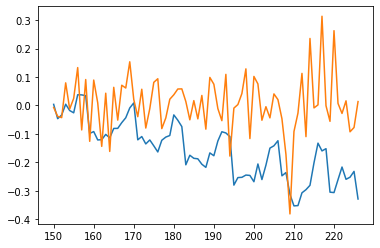

In [243]:

y_pred.plot()
y_act.plot()



In [214]:
df_beat_eps = pd.read_csv('Data Initial - Sheet3.csv')
y_q = '20' + df_beat_eps['quarter'].str[-2:]+'-'+df_beat_eps['quarter'].str[:2]
df_beat_eps['Year-Quarter'] = y_q

In [215]:
df_beat_eps

,quarter,y,Year-Quarter
0,Q4 22,NaN,2022-Q4
1,Q3 22,NaN,2022-Q3
2,Q2 22,NaN,2022-Q2
3,Q1 22,NaN,2022-Q1
4,Q4 21,0.0,2021-Q4
5,Q3 21,1.0,2021-Q3
6,Q2 21,1.0,2021-Q2
7,Q1 21,0.0,2021-Q1
8,Q4 20,0.0,2020-Q4
9,Q3 20,0.0,2020-Q3


In [216]:
df_split_beat = pd.merge(df_split, df_beat_eps, on = 'Year-Quarter', how = 'left')

In [217]:
df_split_beat

,Delta_Closing_Price,fare_Passenger,Headcount,FuelPrice,SeatMile_D,SeatMile_I,CONSSENT,ARTTPADM,Year-Quarter,pct_Change,quarter,y
0,16.82,1.780815e+09,87567.597,2.86434,6108957.0,3891068.0,78.4,881.00,2008-Q1,NaN,NaN,NaN
1,13.35,1.747520e+09,86371.072,2.81774,5840279.0,3561588.0,70.8,897.00,2008-Q1,-0.206302,NaN,NaN
2,8.60,2.146401e+09,86635.881,3.04598,6427809.0,4159649.0,69.5,868.00,2008-Q1,-0.355805,NaN,NaN
3,8.51,2.049935e+09,86859.330,3.11683,5976290.0,4325276.0,62.6,938.00,2008-Q2,-0.010465,NaN,NaN
4,5.70,2.240507e+09,86966.367,3.23252,6292614.0,5343459.0,56.4,1027.00,2008-Q2,-0.330200,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
148,46.92,1.796072e+09,101744.360,1.76412,9809400.0,3577307.0,88.3,701.41,2021-Q2,-0.028169,Q2 21,1.0
149,47.68,2.700882e+09,102147.498,2.78443,10947183.0,3838091.0,82.9,774.51,2021-Q2,0.016198,Q2 21,1.0
150,43.26,3.101126e+09,102552.323,2.78443,11233417.0,3991754.0,85.5,811.76,2021-Q2,-0.092701,Q2 21,1.0
151,39.90,3.616483e+09,102935.837,2.00781,11879190.0,4486317.0,81.2,805.07,2021-Q3,-0.077670,Q3 21,1.0


In [224]:
df_split_beat = df_split_beat.dropna()

half = len(df_split_beat)/2
half = np.floor(half).astype(int)
train_beat = df_split_beat[:half]
test_beat = df_split_beat[half:]

In [228]:
logit_reg = smf.logit('y ~  fare_Passenger + Headcount + CONSSENT + ARTTPADM + q', data = train_beat).fit()
logit_reg.summary()

Optimization terminated successfully.
         Current function value: 0.448850
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   62
Model:                          Logit   Df Residuals:                       54
Method:                           MLE   Df Model:                            7
Date:                Thu, 03 Mar 2022   Pseudo R-squ.:                  0.2549
Time:                        09:55:24   Log-Likelihood:                -27.829
converged:                       True   LL-Null:                       -37.351
Covariance Type:            nonrobust   LLR p-value:                  0.008047
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         23.7005     19.540      1.213      0.225     -14.597      61.998
q[T.Q2]           -0.8858      1.296     -0.683      0.494      -3.426       1.654
q[T.Q3]           -2.6286      1.480     -1.776      0.076      -5.529       0.272
q[T.Q4]           -2.0225      1.138     -1.777      0.076      -4.254       0.209
fare_Passenger  2.535e-09   1.26e-09      2.010      0.044    6.36e-11    5.01e-09
Headcount         -0.0003      0.000     -1.254      0.210      -0.001       0.000
CONSSENT           0.0016      0.066      0.025      0.980      -0.128       0.131
ARTTPADM          -0.0089      0.006     -1.509      0.131      -0.021       0.003
==================================================================================
"""

In [229]:
y_pred = logit_reg.predict(test_beat)
y_act = test_beat['y']

<AxesSubplot:>

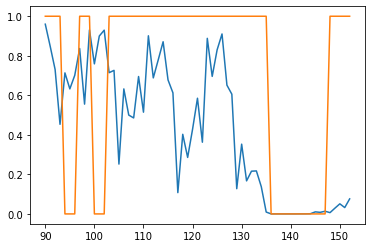

In [230]:
y_pred.plot()
y_act.plot()

In [231]:
y_pred

90     0.959757
91     0.847845
92     0.730563
93     0.453273
94     0.713423
         ...   
148    0.006479
149    0.029187
150    0.051044
151    0.032124
152    0.076071
Length: 63, dtype: float64

In [222]:
df_split_beat['q'] = df_split_beat['quarter'].str[:2]

df_split_beat.head(16)

/var/folders/j4/3nz70q1n3jd2zmmfcc9mn0qh0000gn/T/ipykernel_2896/2561488377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_split_beat['q'] = df_split_beat['quarter'].str[:2]


,Delta_Closing_Price,fare_Passenger,Headcount,FuelPrice,SeatMile_D,SeatMile_I,CONSSENT,ARTTPADM,Year-Quarter,pct_Change,quarter,y,q
28,10.380,3.422586e+09,86122.263,3.21798,8861208.0,7242728.0,69.8,1109.00,2011-Q2,0.059184,Q2 11,0.0,Q2
29,10.080,3.637197e+09,86526.330,3.25938,9165787.0,7478285.0,74.3,1094.00,2011-Q2,-0.028902,Q2 11,0.0,Q2
30,9.170,3.843651e+09,86802.368,3.07566,9544650.0,8448432.0,71.5,1051.00,2011-Q2,-0.090278,Q2 11,0.0,Q2
31,7.890,4.009300e+09,86806.490,3.07159,10084368.0,9097994.0,63.7,1049.00,2011-Q3,-0.139586,Q3 11,0.0,Q3
32,7.530,3.816697e+09,86828.311,3.04250,9713087.0,8789233.0,55.8,1030.00,2011-Q3,-0.045627,Q3 11,0.0,Q3
33,7.500,3.276813e+09,86848.340,3.03146,8754410.0,7335227.0,59.5,1103.67,2011-Q3,-0.003984,Q3 11,0.0,Q3
34,8.520,3.482033e+09,86698.862,2.98676,9009033.0,7166979.0,60.8,1083.00,2011-Q4,0.136000,Q4 11,1.0,Q4
35,8.120,3.229308e+09,86653.624,2.83574,8521964.0,6056280.0,63.7,1078.00,2011-Q4,-0.046948,Q4 11,1.0,Q4
36,8.090,3.174430e+09,86480.148,2.92001,8593745.0,6593358.0,69.9,1007.00,2011-Q4,-0.003695,Q4 11,1.0,Q4
37,10.550,2.965277e+09,86917.200,3.17861,8217035.0,6668517.0,75.0,1058.00,2012-Q1,0.304079,Q1 12,0.0,Q1


In [244]:
df_split_beat.groupby('y').count()

,Delta_Closing_Price,fare_Passenger,Headcount,FuelPrice,SeatMile_D,SeatMile_I,CONSSENT,ARTTPADM,Year-Quarter,pct_Change,quarter,q
y,,,,,,,,,,,,
0.0,36,36,36,36,36,36,36,36,36,36,36,36
1.0,89,89,89,89,89,89,89,89,89,89,89,89
